In [1]:
import os
import numpy as np
import pandas as pd
import pathlib
import glob
import kaleido


def generate_read_frequency_updated_v3(week_folder_path):
    """
    Generate the read_frequency table for a given week's folder.
    
    Parameters:
    - week_folder_path (str): Path to the folder containing the week's CSV files.
    
    Returns:
    - DataFrame: read_frequency table for the week.
    """
    
    # Step 1: Load CSVs from a Folder
    user_ids = []
    for filename in os.listdir(week_folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(week_folder_path, filename)
            day_data = pd.read_csv(file_path, usecols=[0])
            user_ids.extend(day_data.iloc[:, 0].tolist())  # Extract the first column as a series
    
    # Step 2: Combine & Count User IDs
    user_counts = pd.Series(user_ids).value_counts()
    
    # Step 3: Generate read_frequency Table
    frequency_series = user_counts.value_counts()
    frequency_series.name = "tally"  # Explicitly setting the name to avoid naming collisions
    frequency_df = frequency_series.reset_index()
    frequency_df.columns = ["frequency", "tally"]
    frequency_df["percentage"] = (frequency_df["tally"] / frequency_df["tally"].sum()) * 100
    frequency_df = frequency_df.sort_values(by="frequency").reset_index(drop=True)
    
    return frequency_df




# This function can now be called for each week's folder to get the corresponding read_frequency table.


In [2]:
import os
import matplotlib.pyplot as plt

def visualize_weekly_engagement_v3(week_folder_paths, img_name):
    """
    Generate a stacked bar chart representing email open frequency for multiple weeks 
    with consistent coloring and folder names as x-axis labels.
    
    Parameters:
    - week_folder_paths (list): A list of folder paths for each week.
    
    Returns:
    - Displays the stacked bar chart.
    """
    
    # Color map for frequencies
    color_map = {
        1: "#1f77b4",  # blue
        2: "#ff7f0e",  # orange
        3: "#2ca02c",  # green
        4: "#d62728",  # red
        # ... add more colors if expecting higher frequencies
    }
    
    # Gather data for each week
    weekly_data = [generate_read_frequency_updated_v3(path) for path in week_folder_paths]
    
    # Extracting folder names from paths for x-axis labels
    folder_names = [os.path.basename(path) for path in week_folder_paths]
    
    # Plotting
    fig, ax = plt.subplots(figsize=(12, 8))
    for week_index, data in enumerate(weekly_data):
        bottom_value = 0  # To stack bars
        for _, row in data.iterrows():
            label = f"Frequency {row['frequency']}" if week_index == 0 else ""  # Avoid duplicate labels
            ax.bar(week_index, row['tally'], bottom=bottom_value, label=label, color=color_map.get(row['frequency'], "#333333"))
            # Adding percentage text inside bars
            ax.text(week_index, bottom_value + (0.5 * row['tally']), f"{row['percentage']:.2f}%", 
                    ha='center', va='center', color='white', fontsize=10)
            bottom_value += row['tally']
        # Labeling total tally on top of each bar
        ax.text(week_index, bottom_value, str(int(bottom_value)), ha='center', va='bottom', color='black', fontsize=10)
    
    # Adjusting the plot
    ax.set_xticks(range(len(week_folder_paths)))
    ax.set_xticklabels(folder_names)
    ax.set_ylabel("Number of Users")
    ax.set_title("Weekly Email Open Frequencies")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title="Open Frequency", loc='upper center', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig(img_name)
    plt.show()






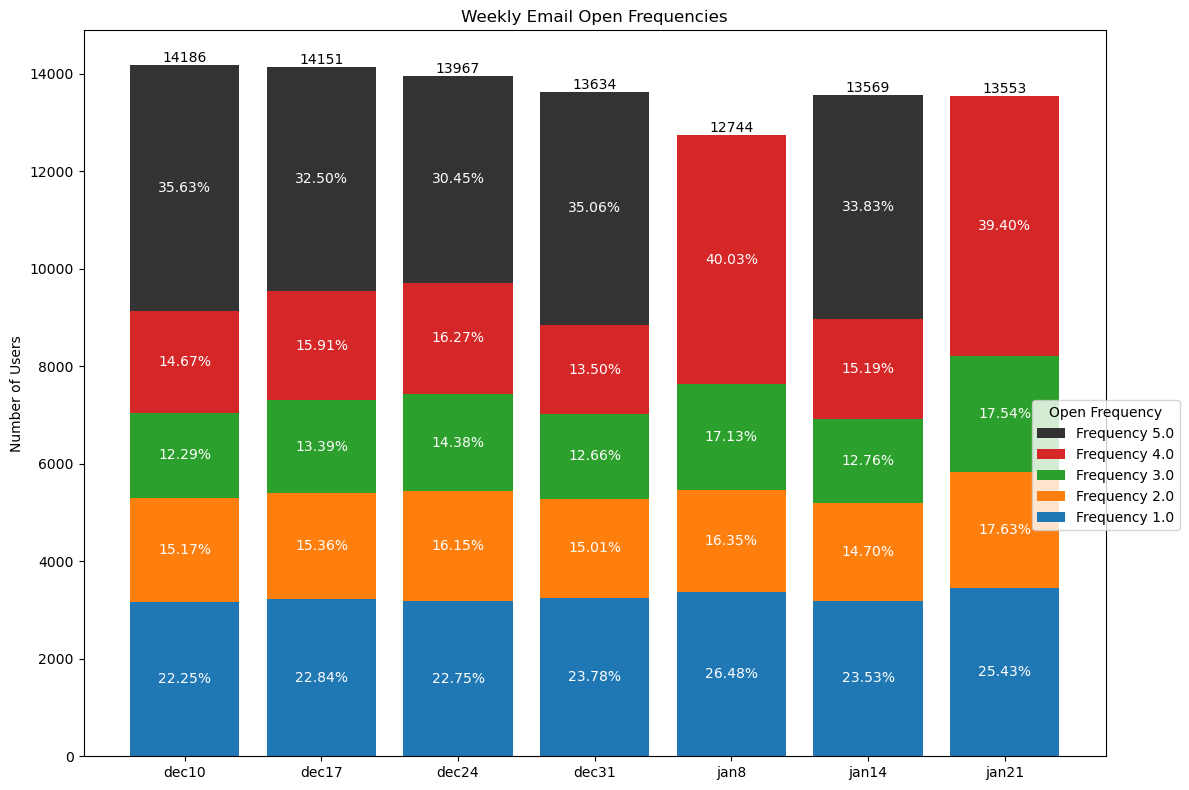

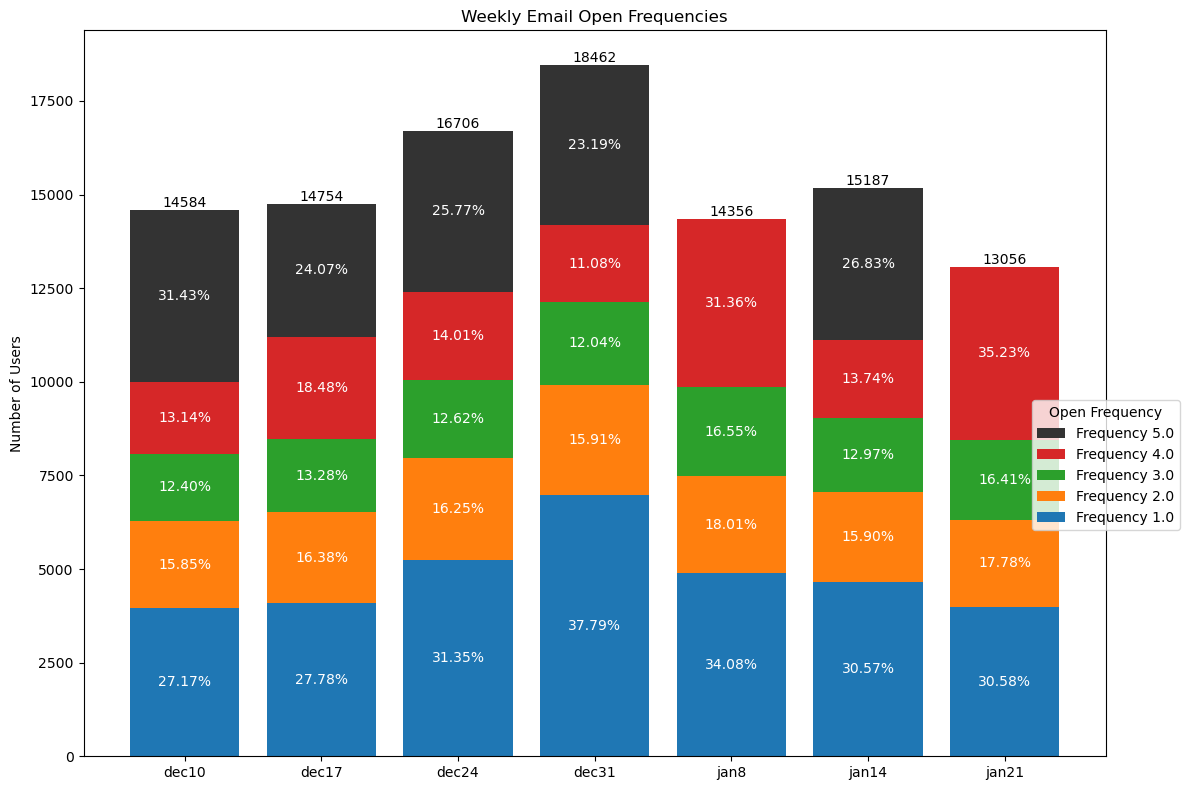

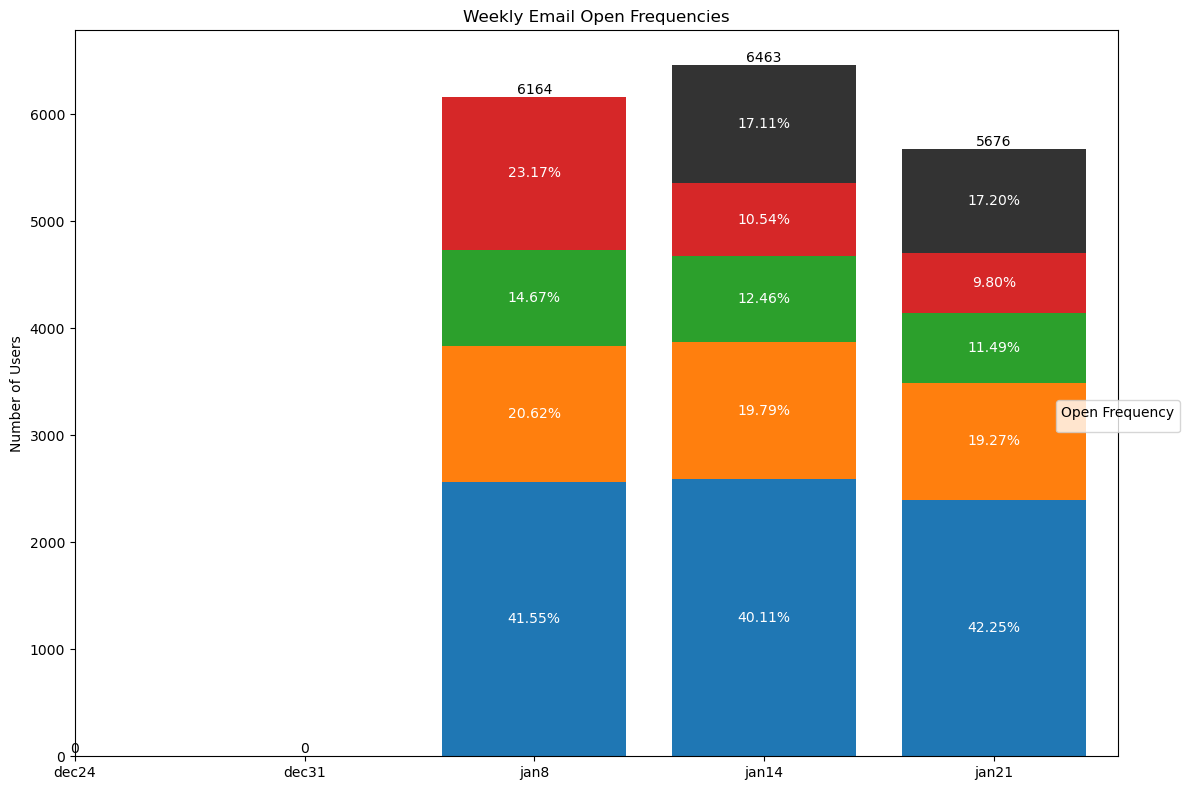

In [9]:
en_week_folders = [

    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\en\dec10",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\en\dec17",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\en\dec24",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\en\dec31",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\en\jan8",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\en\jan14",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\en\jan21"



]
visualize_weekly_engagement_v3(en_week_folders, "EN_Engagment_jan21")


ar_week_folders = [

    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\ar\dec10",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\ar\dec17",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\ar\dec24",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\ar\dec31",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\ar\jan8",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\ar\jan14",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\ar\jan21"




]
visualize_weekly_engagement_v3(ar_week_folders, "AR_Engagment_jan21")

saudi_week_folders = [

    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks_saudi\dec24",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks_saudi\dec31",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks_saudi\jan8",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks_saudi\jan14",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks_saudi\jan21",




]
visualize_weekly_engagement_v3(saudi_week_folders, "Saudi_Engagment_jan21")